In [2]:
import pandas as pd

In [3]:
# Read the BBBP dataset
df = pd.read_csv("BBBP.csv")

# Drop rows with missing values
df = df.dropna()

# Print 10 random SMILES strings
print(df.sample(10)["smiles"].values)

['C1=C(C=CC3=C1N(CCCN2CCC(CC2)O)C4=C(S3)C=CC=C4)C#N'
 'C1=C(C3=C(N=C1N2CCN(CC)CC2)CCCCCC3)C4=CC=C(F)C=C4'
 'c12c(C(N(Cc3n1cnc3c1noc(n1)C(CO)(CO)C)C)=O)c(ccc2)Cl'
 'CC(C)(Oc1ccc(Cl)cc1)C(O)=O'
 'COc1ccc2C[C@@H]3[C@@H]4C=C[C@H](O)[C@@H]5Oc1c2[C@]45CCN3C'
 'OC(=O)C1=C(CS[C@@H]2[C@H](NC(=O)Cc3sccc3)C(=O)N12)CSc4[nH]ncn4'
 'C1=C(C(=CC=C1OCC2=NCCN2)Cl)Cl' 'C1=CC(=CC=C1C(CC(C)(C)O)(C)O)Cl'
 'C1CN(CCC1)Cc1cccc(c1)OCCCO' 'CN1C(=O)N(C)c2nc[nH]c2C1=O']


SMILES stands for Simplified Molecular-Input Line-Entry System. It's a way to represent molecules using letters, numbers, and symbols. Here's an example for water (H2O):
O=H-H

The O means there is an oxygen atom. The = connects the oxygen to a hydrogen atom. The - connects the oxygen to another hydrogen atom. So O=H-H shows the 2 hydrogen atoms bonded to the oxygen, just like in a water molecule!

SMILES uses simple rules so we can write down many kinds of molecules easily on a computer. We don't have to draw pictures of the molecules every time. SMILES lets us store and share information about molecules using text.

<Axes: >

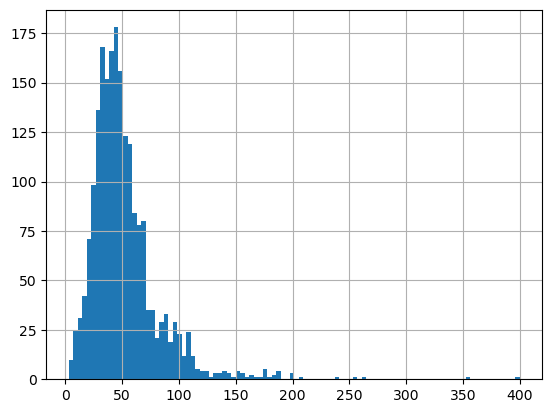

In [4]:
# Show the SMILES strings length distribution
df["smiles"].str.len().hist(bins=100)

It looks like SIMLES string in given dataset has some kind of Gamma or Normal distribution. Let's check it out.

shape: 0.43196109015880996, loc: -9.831977949438091, scale: 55.64928070973342


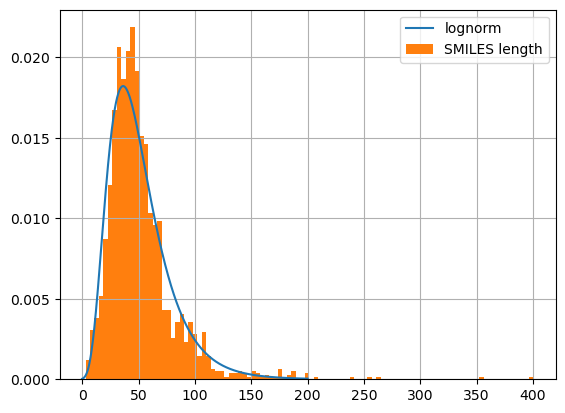

In [5]:
# Fit lognormal distribution to the SMILES strings length distribution
from scipy.stats import lognorm
import numpy as np
import matplotlib.pyplot as plt

# Fit lognormal distribution to the SMILES strings length distribution
shape, loc, scale = lognorm.fit(df["smiles"].str.len())
print(f"shape: {shape}, loc: {loc}, scale: {scale}")

# Plot the SMILES strings length distribution and the fitted lognormal distribution
x = np.linspace(0, 200, 1000)
plt.plot(x, lognorm.pdf(x, shape, loc, scale), label="lognorm")
df["smiles"].str.len().hist(bins=100, density=True, label="SMILES length")
plt.legend()
plt.show()



It looks like SIMLES string has log-normal distribution. At least for me :)

In [99]:
import re
def tokenize(smiles):
    """
    Tokenize a SMILES molecule string.
    """
    # Split according to parantheses and square brackets
    tokens = re.split(r'(\[[^\]]*\]|\([^\)]*\))', smiles)

    # Remove empty tokens
    tokens = [token for token in tokens if token != '']

    # Split each with a number in between
    tokens = [re.split(r'(\d+)', token) for token in tokens]

    # Remove single parantheses and square brackets from string tokens
    tokens = [[token.strip("[]()") for token in token_list] for token_list in tokens]

    
    # Concatenate every string in the nested list
    tokens = ["".join(token_list) for token_list in tokens]
    
    return tokens

smiles = 'CN(C)[C@H]1[C@@H]2C[C@H]3C(=C(O)c4c(O)cccc4[C@@]3(C)O)C(=O)[C@]2(O)C(=O)\C(=C(/O)NCN5CCCC5)C1=O' 
print(tokenize(smiles))


['CN', 'C', 'C@H', '1', 'C@@H', '2C', 'C@H', '3C', '=C(O', 'c4c', 'O', 'cccc4', 'C@@', '3', 'C', 'O)C', '=O', 'C@', '2', 'O', 'C', '=O', '\\C', '=C(/O', 'NCN5CCCC5C1=O']


[list(['CC', 'CCc1ccccc1', 'NCC', 'O', 'c2ccc', 'O', 'c', 'c2', 'C', 'N', '=O'])
 list(['C2=C', 'N1CC(CO', 'OC1=O)C=CC=C2C'])
 list(['COc1ccc2nccc', 'C@@H](O', 'C@@H', '3C', 'C@H', '4CCN3C', 'C@@H', '4C=C)c2c1'])
 list(['OC', '=O', 'C1=C', 'CS[C@@H2C@H](NC(=O', 'Cc3sccc3C', '=O', 'N12CSc4', 'nH', 'ncn4'])
 list(['C@@H', '4', 'C1=C2C(=CC(=C1', 'Br)CCO2C3=C', 'C=C(Cl', 'C', '=C3', 'O)CCN', 'C4', 'C'])
 list(['CC', 'Cc1ccccc1', 'NO']) list(['O=C2N1C', 'NC(=O', 'C1CC2'])
 list(['CNC', 'C', 'C', 'O', 'c1ccc', 'O', 'cc1'])
 list(['C@@', '23', 'Cl', 'C1', 'C(=CC(=O', 'C=C1', 'C@@H', 'F', 'CC2C5C', 'CC3Cl', 'C@4C(=O', 'CO)OC', 'O[C@@H4C5', 'C', 'C)C)C'])
 list(['CCC', 'O', '\\C=C\\Cl', 'C#C'])]


<Axes: >

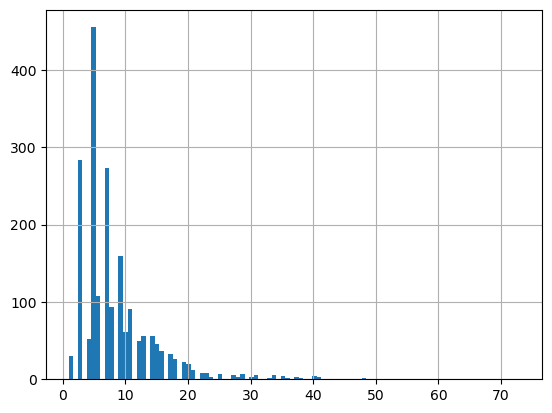

In [100]:
# Tokenize the SMILES strings
df["tokens"] = df["smiles"].apply(tokenize)

# Print 10 random tokenized SMILES strings
print(df.sample(10)["tokens"].values)

# Show the tokens length distribution
df["tokens"].str.len().hist(bins=100)

In [103]:
from sklearn.preprocessing import MultiLabelBinarizer

# Create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# One-hot encode the tokens
one_hot_encoded = mlb.fit_transform(df["tokens"])

# Create a new dataframe with the one-hot encoded tokens
one_hot_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)

# Concatenate the original dataframe with the one-hot encoded tokens dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Print 5 samples
df_encoded.sample(5)


,num,name,p_np,smiles,tokens,,#,%10C,%10NC,%10OC,...,on1,on2/C,onc3c4ccccc4Cl)C2=O)C,s1c,s1cc,sc1,sc1CSCCNC,scc1,scc1c1ccccc1,scc2CN1CCCC1=O
1508,1512,proxorphan,1,Oc5ccc4CC2C1CCOCC1(CCN2CC3CC3)c4c5,"[Oc5ccc4CC2C1CCOCC1, CCN2CC3CC3, c4c5]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1328,1332,lofendazam,1,C1=C(Cl)C=CC3=C1N(C2=CC=CC=C2)C(CCN3)=O,"[C1=C, Cl, C=CC3=C1N, C2=CC=CC=C2, C, CCN3, =O]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
764,766,cefcapene,0,CC/C=C(C(=O)N[C@H]1[C@H]2SCC(=C(N2C1=O)C(O)=O)...,"[CC/C=C, C(=O, N, C@H, 1, C@H, 2SCC, =C(N2C1=O...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1516,1520,ramciclane,1,C1=CC=CC=C1CC2(C3(C(C)(C)C(C2)CC3)C)OCCN(C)C,"[C1=CC=CC=C1CC2, C3C(C, C, C, C2, CC3C)OCCN, C...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
625,627,skb-d,0,c1cc2c(C(N[C@@H](CC)c3ccccc3)=O)c(c(nc2cc1)c1c...,"[c1cc2c, C(N[C@@H](CC, c3ccccc3=O)c, c(nc2cc1,...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
